# Run-of-River Hydro Power Plant Designer

## Project Details

<ins>Specify project name and address below:</ins>

In [200]:
proj = 'Manupali HPP'
addr = 'Brgy. Cawayan, Lantapan, Bukidnon'

<ins>Input site elevation data:</ins>

_Top of weir crest elevation, m a.s.l._

In [201]:
z_crest = 878.0

_Powerhouse elevation, m a.s.l._

<p>For reaction turbines, use tailwater elevation.<br>For impulse turbines, use turbine centerline elevation.</p>

In [202]:
z_ph = 800.0

Solve for gross head, meters

In [203]:
H_gross = z_crest - z_ph
H_gross

78.0

<ins>Specify plant/unit design flow/discharge:</ins>

_Plant design flow/discharge, m<sup>3</sup>/s_

In [204]:
Q_plant = 6.0

_Number of turbine-generating units_

In [205]:
n_turbine = 2

_Unit design flow/discharge, m<sup>3</sup>/s_

In [206]:
Q_unit = Q_plant / n_turbine

In [207]:
Q_unit

3.0

## Turbine Selection

<p>Plot gross head versus unit discharge in the turbine selection chart to determine suitable turbine type for the power plant.</p>

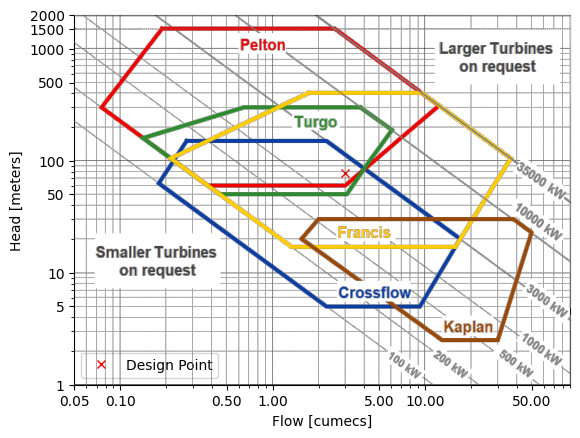

In [208]:
import matplotlib
import matplotlib.pyplot as plt

data = [Q_unit, H_gross]

xmin, xmax, ymin, ymax = (0.05, 90, 1, 2000)

ax = plt.gca()
ax.plot(Q_unit, H_gross, 'rx', markersize=6, label="Design Point")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Flow [cumecs]')
ax.set_ylabel('Head [meters]')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(loc='lower left')
ax.set_zorder(5)
ax.set_facecolor('white')
ax.set_xticks([0.05, 0.1, 0.5, 1, 5, 10, 50])
ax.set_yticks([1, 5, 10, 50, 100, 500, 1000, 1500, 2000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax_tw_x = ax.twinx()
ax_tw_x.axis('off')
ax2 = ax_tw_x.twiny()

image = plt.imread('images/Turbinenportfolio_WKV_cropped.png')
ax2.imshow(image, extent=[xmin, xmax, ymin, ymax], aspect='auto')
ax2.axis('off')
plt.show()

_Source: <www.wkv-ag.com>_

<p>Choose the appropriate turbine type based on the turbine selection chart. Turbines are classified either reaction type or impulse type.<br>
Reaction type turbines define gross head from the tailwater level, while Impulse type turbines define gross head from the turbine<br>
centerline. Francis and Kaplan turbines are types of reaction turbines, while Pelton and Turgo turbines are types of impulse turbines.</p>

_For reaction type turbines, type is 0<br>
For impulse type turbines, type is 1_

In [209]:
type = 0

## Constants

_Water Density at 20 degrees C, kg/m<sup>3</sup>_

In [210]:
rho = 998.21

_Acceleration due to gravity, m/s<sup>2</sup>_

In [211]:
g = 9.807

_Site Atmospheric Pressure, meters WC_

$P_{atm} = 101325*[(1-0.0000225577*z_{ph})^{5.25588}]/(rho*g)$

In [212]:
p_atm = 101325*((1-0.0000225577*z_ph)**(5.25588))/(rho*g)
p_atm

9.405678906490746

_Water Vapor Pressure at 20 degrees C, meters WC_

In [213]:
p_wv = 2.34*1000/(rho*g)
p_wv

0.23903294698060154

_Turbine and Generator Efficiencies, %_
> Reaction turbines have efficiencies ranging from 0.90 to 0.92<br>
Impulse turbines have efficiencies ranging from 0.89 to 0.91<br>
Synchronous generators have efficiencies ranging from 0.94 to 0.96

In [214]:
eff_turb = 0.90
eff_gen = 0.96

_Generator Power Factor (cos phi)_
>Typically, generators are designed at 0.80 or 0.85 cos phi

In [215]:
pf= 0.80